# All distances between two selections

Here we use ``distances.distance_array`` to quantify the distances between each atom of a target set to each atom in a reference set, and show how we can extend that to calculating the distances between the centers-of-mass of residues.

**Last executed:** May 18, 2021 with MDAnalysis 1.1.1

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.19.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests
   
**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)



In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PDB_small
from MDAnalysis.analysis import distances

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>) AdK has three domains: 

  * CORE
  * LID: an ATP-binding domain (residues 122-159)
  * NMP: an AMP-binding domain (residues 30-59)
  

In [2]:
u = mda.Universe(PDB_small)   # open AdK

## Calculating atom-to-atom distances between non-matching coordinate arrays

We select the alpha-carbon atoms of each domain.

In [3]:
LID_ca = u.select_atoms('name CA and resid 122-159')
NMP_ca = u.select_atoms('name CA and resid 30-59')

n_LID = len(LID_ca)
n_NMP = len(NMP_ca)
print('LID has {} residues and NMP has {} residues'.format(n_LID, n_NMP))

LID has 38 residues and NMP has 30 residues


`distances.distance_array`([API docs](https://docs.mdanalysis.org/stable/documentation_pages/analysis/distances.html#MDAnalysis.analysis.distances.distance_array)) will produce an array with shape `(n, m)` distances if there are `n` positions in the reference array and `m` positions in the other configuration. If you want to calculate distances following the minimum image convention, you *must* pass the universe dimensions into the ``box`` keyword.

In [4]:
dist_arr = distances.distance_array(LID_ca.positions, # reference
                                    NMP_ca.positions, # configuration
                                    box=u.dimensions)
dist_arr.shape

(38, 30)

### Plotting distance as a heatmap

Text(0, 0.5, 'Distance (Angstrom)')

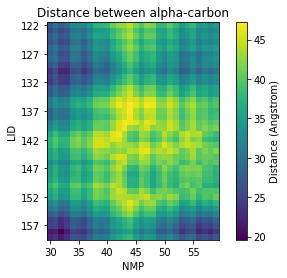

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(dist_arr, origin='upper')

# add residue ID labels to axes
tick_interval = 5
ax.set_yticks(np.arange(n_LID)[::tick_interval])
ax.set_xticks(np.arange(n_NMP)[::tick_interval])
ax.set_yticklabels(LID_ca.resids[::tick_interval])
ax.set_xticklabels(NMP_ca.resids[::tick_interval])

# add figure labels and titles
plt.ylabel('LID')
plt.xlabel('NMP')
plt.title('Distance between alpha-carbon')

# colorbar
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')

## Calculating residue-to-residue distances

As `distances.distance_array` just takes coordinate arrays as input, it is very flexible in calculating distances between each atom, or centers-of-masses, centers-of-geometries, and so on.

Instead of calculating the distance between the alpha-carbon of each residue, we could look at the distances between the centers-of-mass instead. The process is very similar to the atom-wise distances above, but we give `distances.distance_array` an array of residue center-of-mass coordinates instead.

In [6]:
LID = u.select_atoms('resid 122-159')
NMP = u.select_atoms('resid 30-59')

LID_com = LID.center_of_mass(compound='residues')
NMP_com = NMP.center_of_mass(compound='residues')

n_LID = len(LID_com)
n_NMP = len(NMP_com)

print('LID has {} residues and NMP has {} residues'.format(n_LID, n_NMP))

LID has 38 residues and NMP has 30 residues


We can pass these center-of-mass arrays directly into `distances.distance_array`.

In [7]:
res_dist = distances.distance_array(LID_com, NMP_com,
                                    box=u.dimensions)

### Plotting

Text(0, 0.5, 'Distance (Angstrom)')

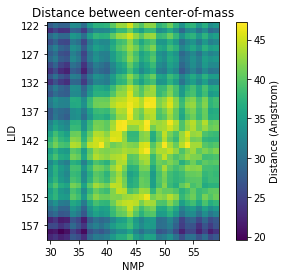

In [8]:
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(res_dist, origin='upper')

# add residue ID labels to axes
tick_interval = 5
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
ax2.set_yticklabels(LID.residues.resids[::tick_interval])
ax2.set_xticklabels(NMP.residues.resids[::tick_interval])

# add figure labels and titles
plt.ylabel('LID')
plt.xlabel('NMP')
plt.title('Distance between center-of-mass')

# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance (Angstrom)')

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.